In [ ]:
#Handle imports

In [71]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [29]:
#Load data
#Display shape of x and y
#See the images
#Split the data

(1797, 64)
X train shape:  (1297, 64)
X test shape:  (500, 64)
Y train shape:  (1297,)
Y test shape:  (500,)


<Figure size 640x480 with 0 Axes>

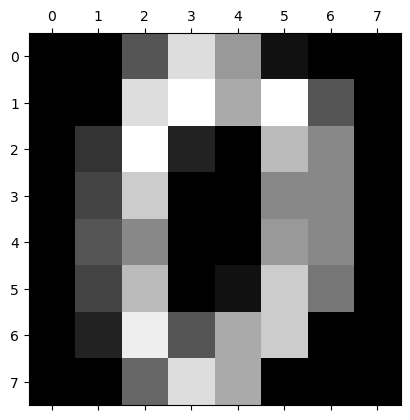

In [61]:
digits = load_digits()

#Display the shape of X and Y
print(digits.data.shape)

#Look at what the data actually looks like
plt.gray()
plt.matshow(digits.images[0])

#Create an index array for tracking original index
indices = np.arange(len(digits.data))

#Randomly split data
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    digits.data, digits.target, indices, test_size=500, random_state=42
)

print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("Y train shape: ", y_train.shape)
print("Y test shape: ", y_test.shape)

In [ ]:
#Randomly select 10 samples and their labels
#Display the images

Label:  4
Label:  8
Label:  3
Label:  3
Label:  5
Label:  0
Label:  5
Label:  0
Label:  9
Label:  4


<Figure size 640x480 with 0 Axes>

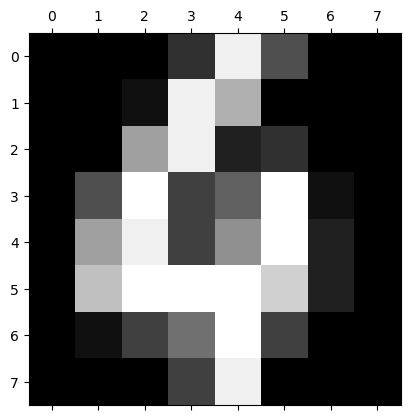

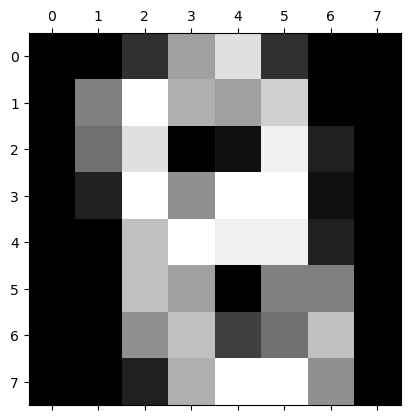

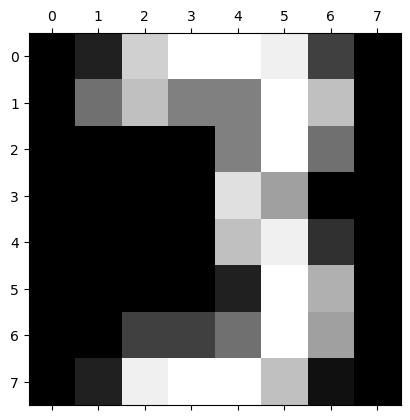

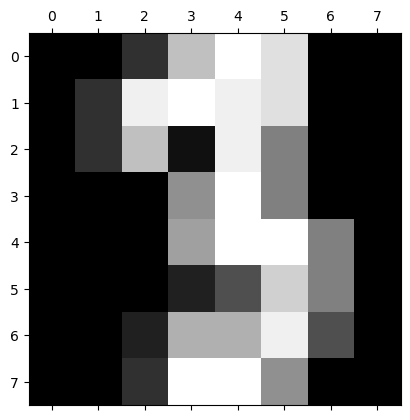

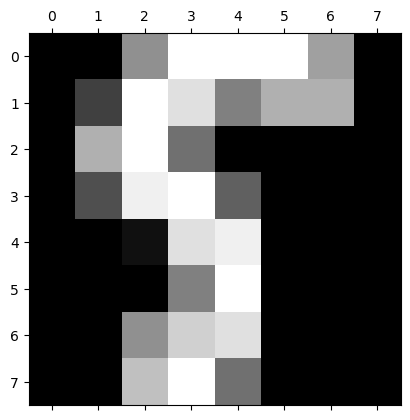

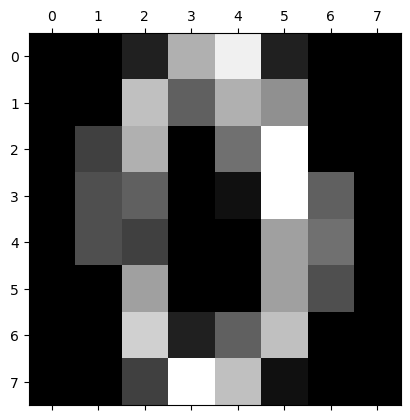

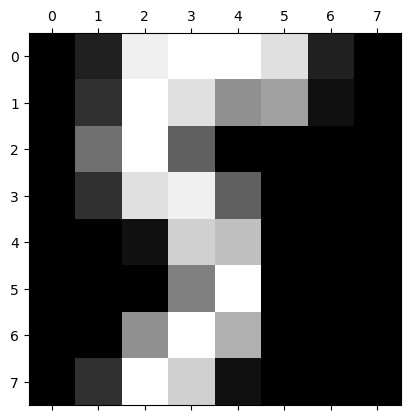

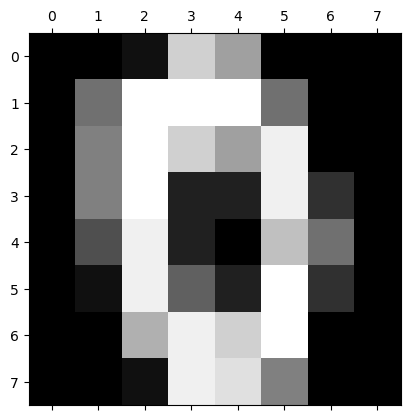

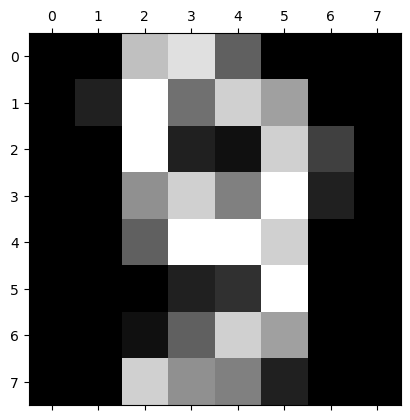

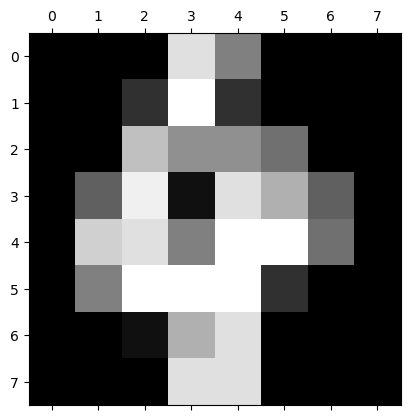

In [63]:
#Select 10 random indices
random_indices = np.random.choice(len(X_train), 10, replace=False)
for i in random_indices:
    index = train_indices[i]
    plt.gray()
    plt.matshow(digits.images[index])
    print("Label: ", y_train[i])

In [ ]:
#Train the models with the different k values

In [79]:
#Train the various models
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(X_train, y_train)

model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train, y_train)

model5 = KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train, y_train)

model7 = KNeighborsClassifier(n_neighbors=7)
model7.fit(X_train, y_train)

model9 = KNeighborsClassifier(n_neighbors=9)
model9.fit(X_train, y_train)

models = {model1, model3, model5, model7, model9}

In [ ]:
#Calculate the F1 scores

In [87]:
f1_scores = []

for model in models:
    #Predict the labels of X_test
    y_pred = model.predict(X_test)

    #Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

#Display the F1 scores in a table
f1_table = pd.DataFrame({'k': [1,3,5,7,9], 'F1 Score': f1_scores})
print(f1_table)

   k  F1 Score
0  1  0.989941
1  3  0.984033
2  5  0.993981
3  7  0.991967
4  9  0.981890


In [ ]:
#Randomly select from test images and display image and label


Classifier with k=1:


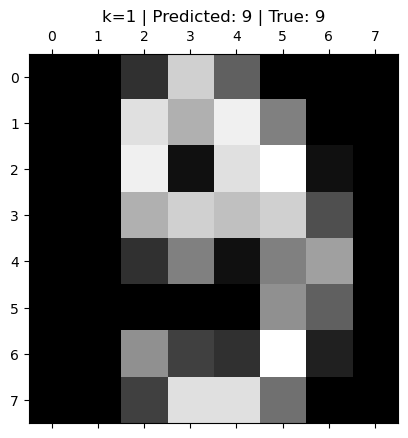

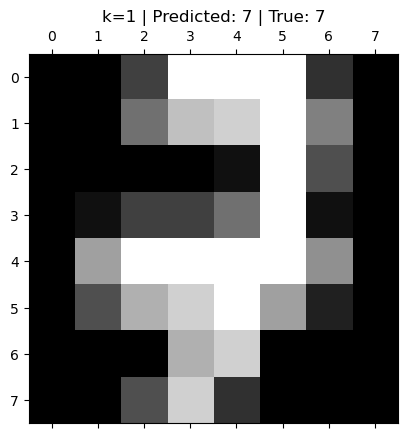

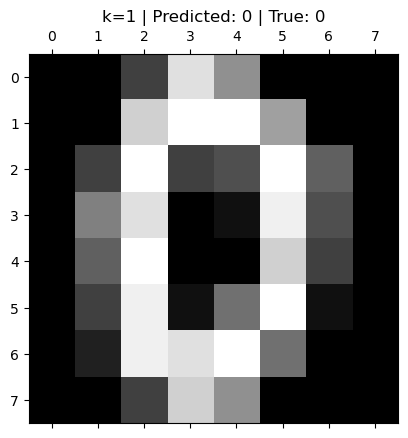

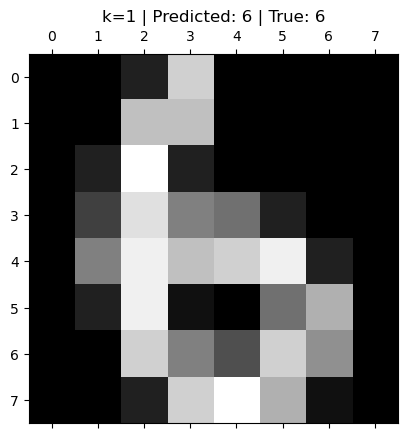

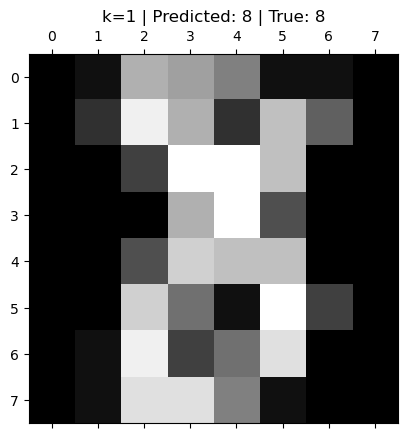


Classifier with k=3:


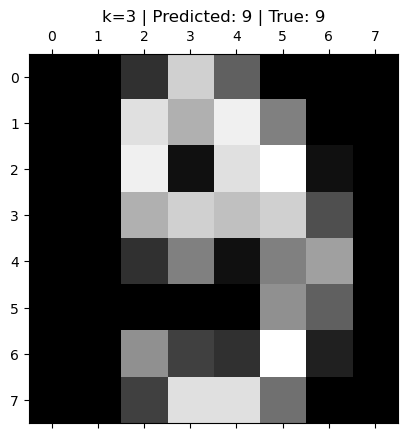

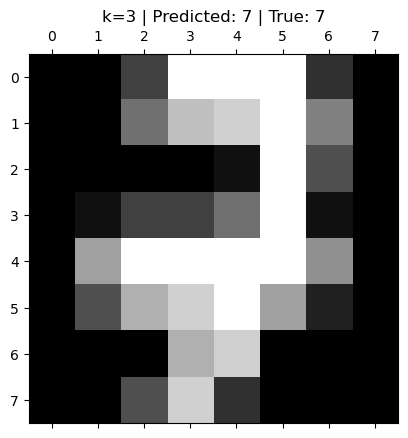

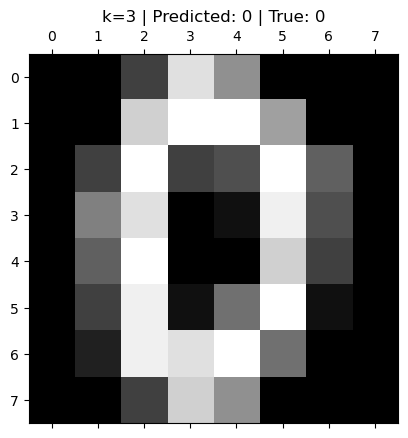

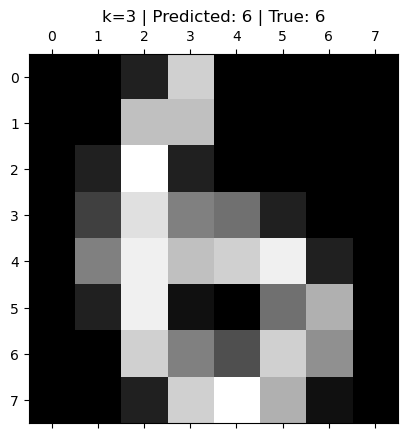

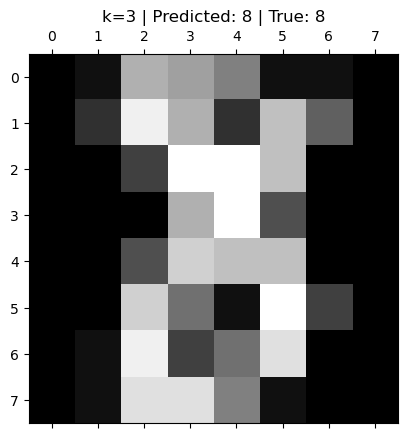


Classifier with k=5:


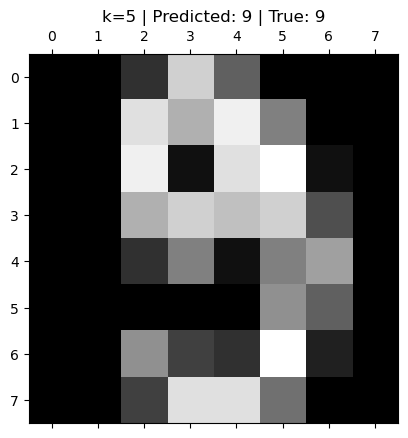

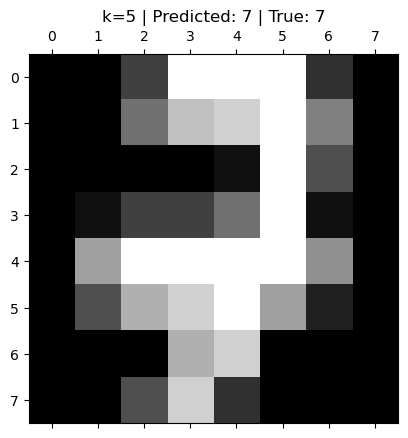

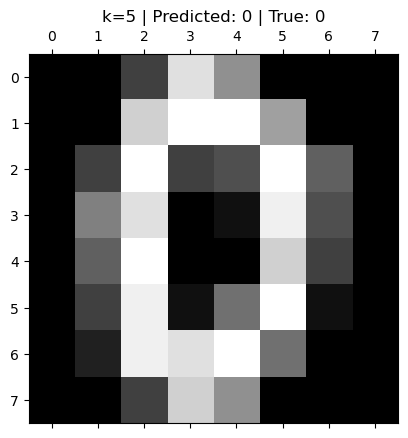

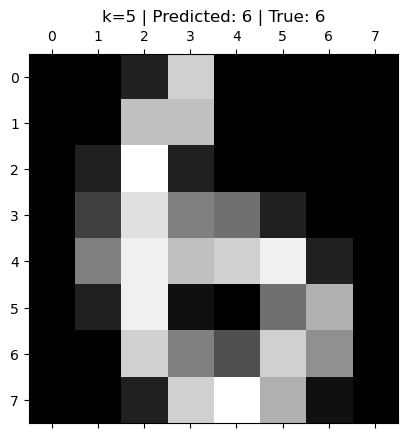

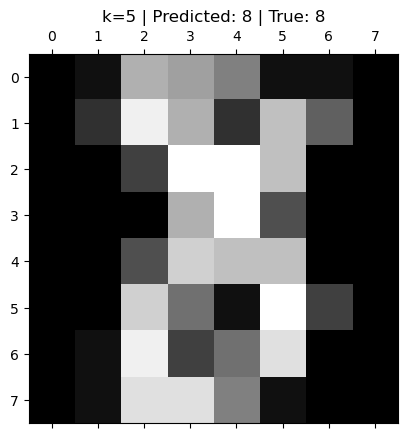


Classifier with k=7:


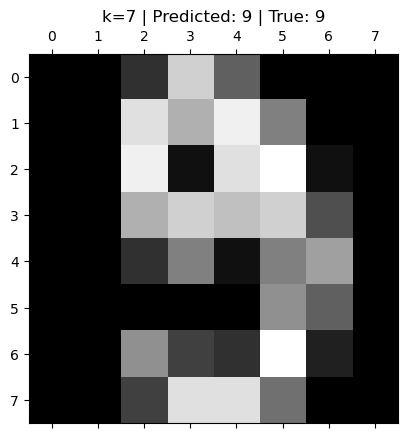

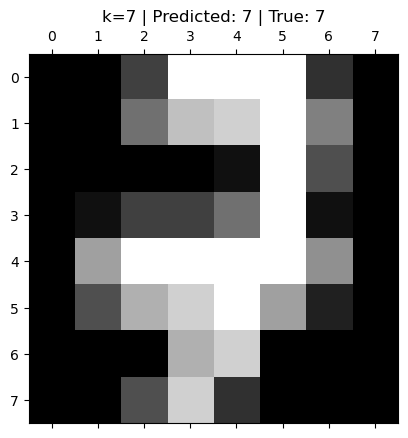

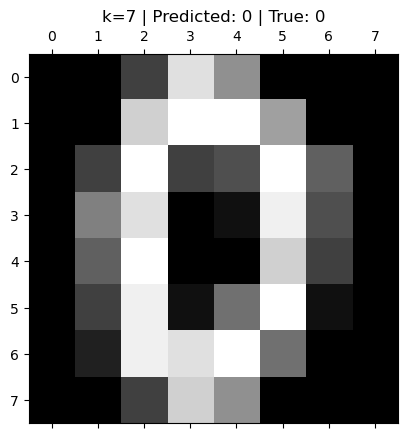

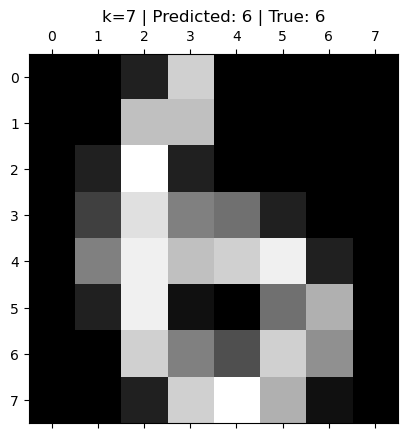

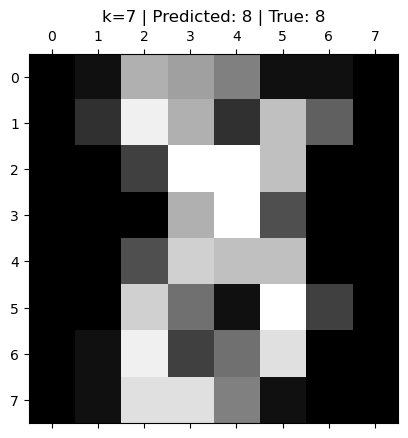


Classifier with k=9:


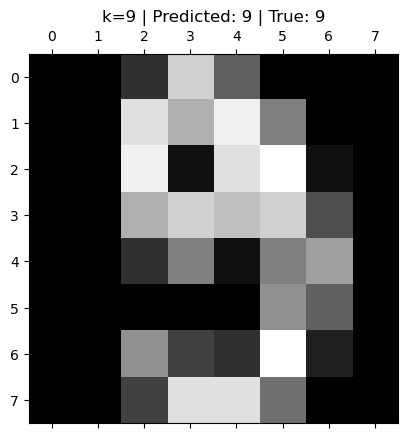

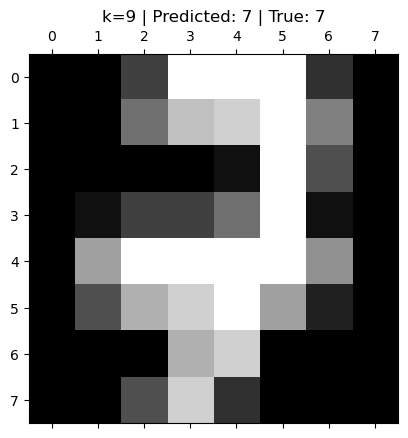

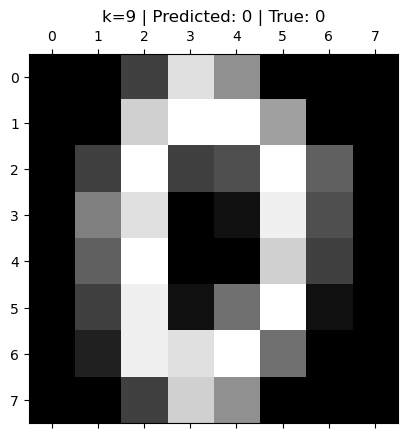

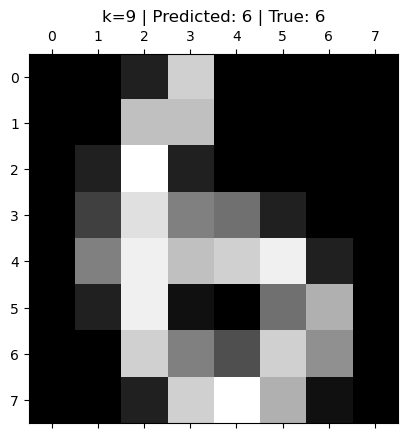

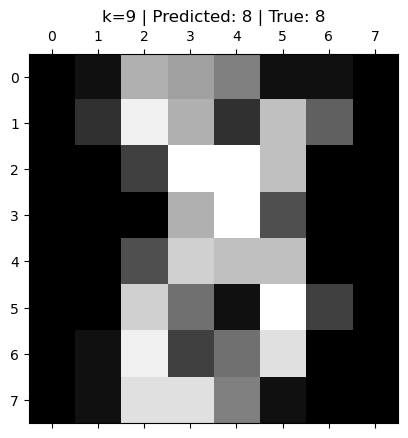

In [95]:
random_indices = np.random.choice(len(X_test), 5, replace=False)

k = 1

#Display the images with predictions and true labels
for model in models:
    print(f"\nClassifier with k={k}:")
    for index in random_indices:
        
        i = test_indices[index]
        plt.figure()
        plt.gray()
        plt.matshow(digits.images[i], fignum=0)

        #Get predicted and true labels
        predicted_label = model.predict([X_test[index]])[0]
        true_label = y_test[index]

        #Set title with k value, predicted label, and true label
        plt.title(f"k={k} | Predicted: {predicted_label} | True: {true_label}")
        plt.show()
    k = k+2

In [ ]:
#Check when the model is incorrect


Classifier with k=1:


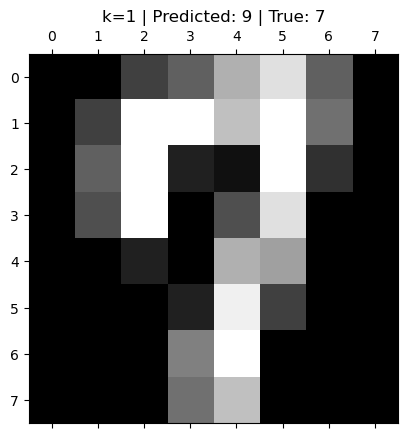

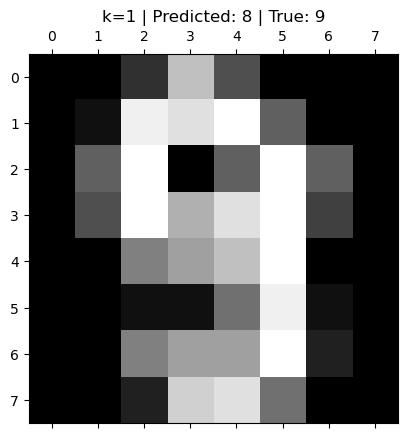

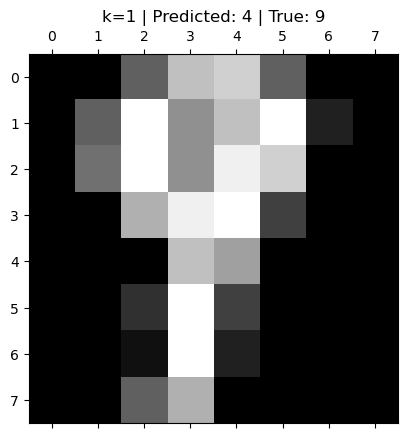

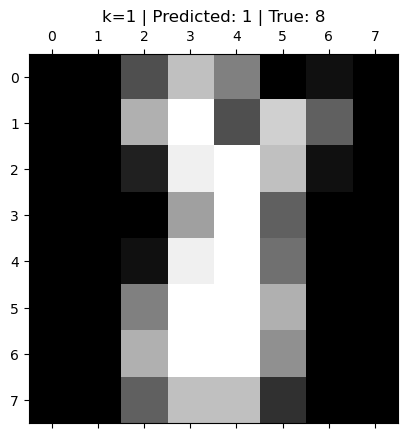

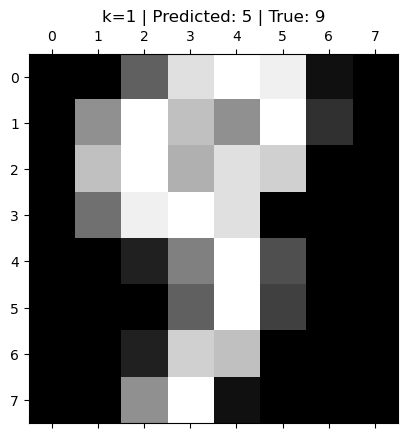


Classifier with k=3:


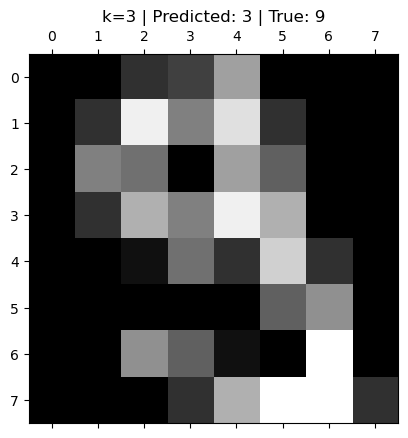

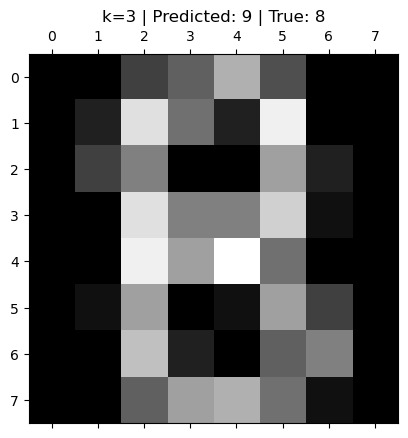

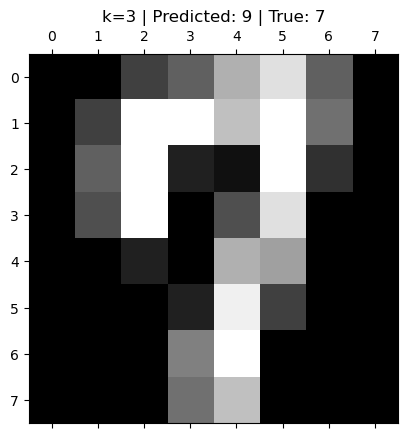

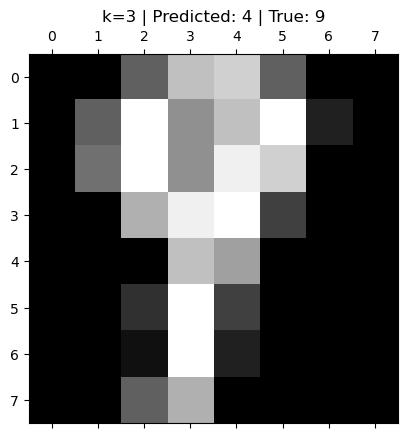

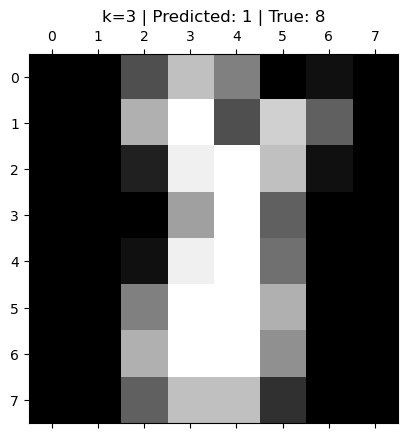


Classifier with k=5:


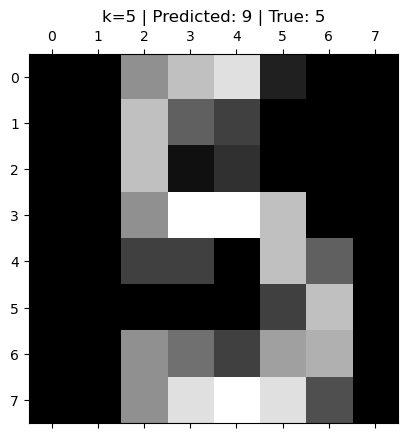

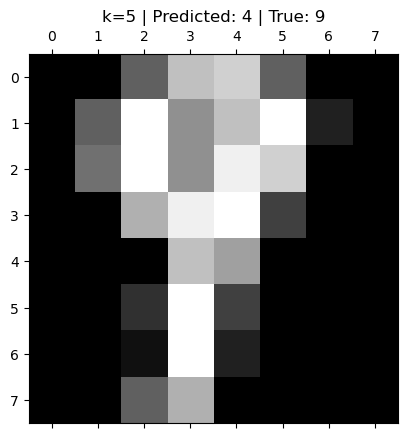

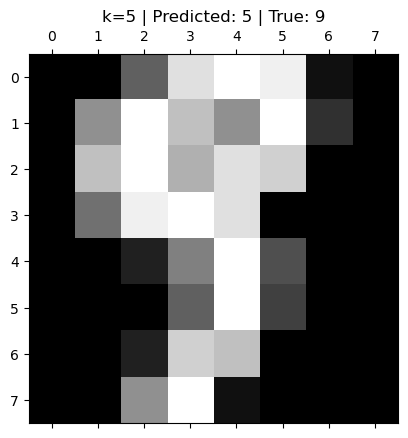


Classifier with k=7:


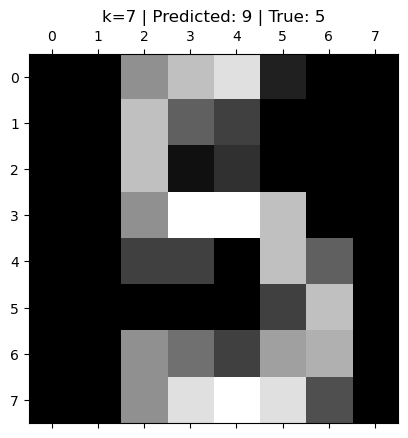

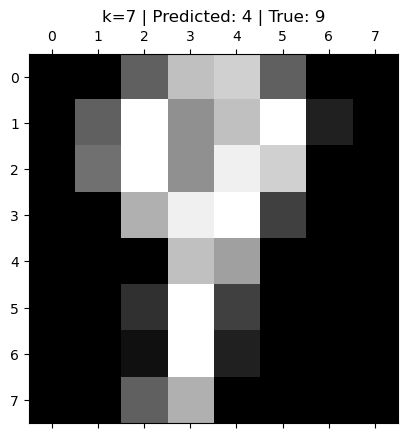

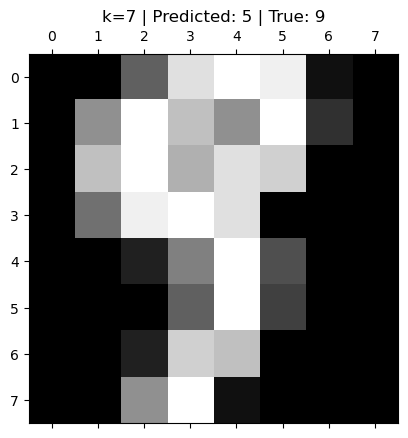

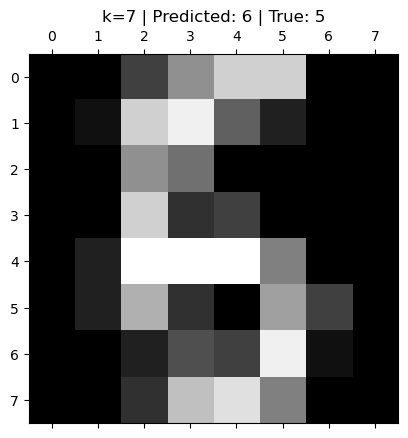


Classifier with k=9:


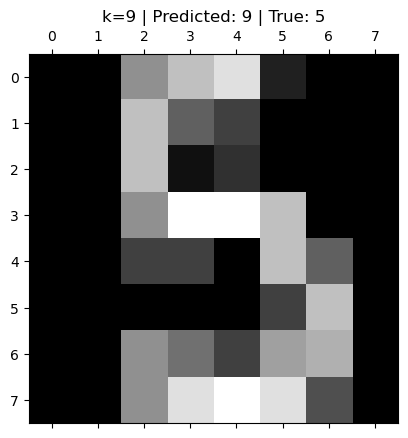

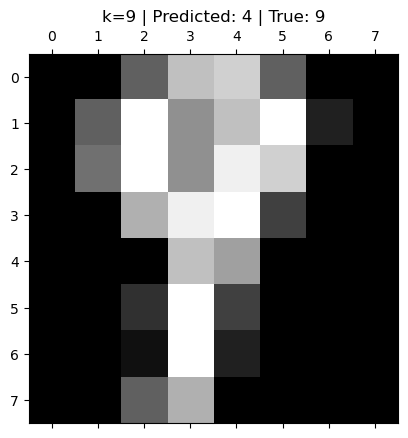

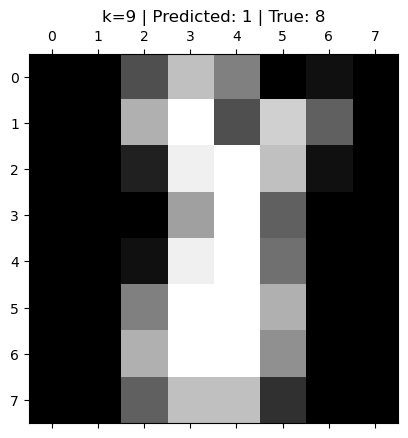

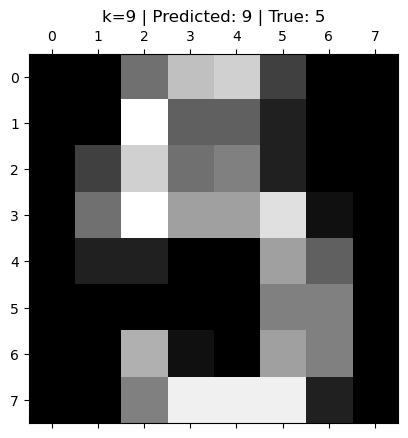

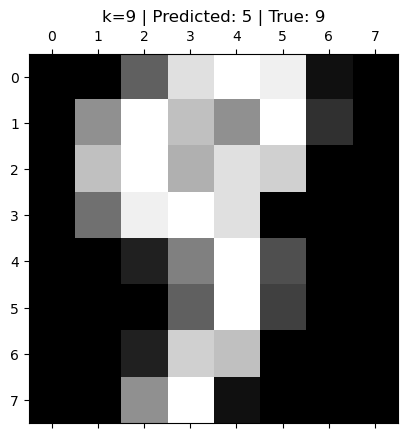

In [100]:
#Incorrect predictions per classifier
k = 1
for model in models:
    print(f"\nClassifier with k={k}:")
    incorrect_predictions = 0

    for index in range(len(X_test)):
        i = test_indices[index]  # Map back to the original digits index

        # Get predicted and true labels
        predicted_label = model.predict([X_test[index]])[0]
        true_label = y_test[index]

        # Check if prediction is incorrect
        if predicted_label != true_label:
            plt.figure()
            plt.gray()
            plt.matshow(digits.images[i], fignum=0)

            # Annotate the plot with k, predicted label, and true label
            plt.title(f"k={k} | Predicted: {predicted_label} | True: {true_label}")
            plt.show()
            
            incorrect_predictions += 1
            
        # Limit the display to 5 incorrect predictions per classifier for readability
        if incorrect_predictions >= 5:
            break
    k = k+2

In [ ]:
#Conclusion/Final finding
'''
The model has trouble when the images are very similar to other classes. Even I would have issues with some of these images and I'm sure most people
would agree. The incorrectly labeled images either look like other numbers or they don't even look dinstinguishable. Despite these shortcomings the 
model performs very highly in any number of k specifications. I am overall pretty happy and impressed with the various models and will continue to use
them in other areas if possible.
'''